<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter8/TreeDepthCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


# Example 8.2
## Import modules

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import linear_model
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(1357)

## Original Program

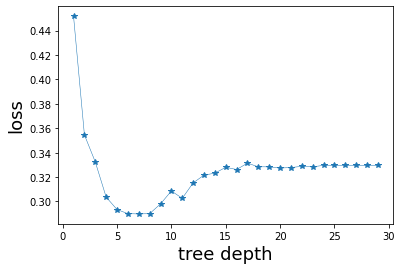

In [4]:
def ZeroOneScore(clf, X, y):
    y_pred = clf.predict(X)
    return zero_one_loss(y, y_pred)


# Construct the training set 
X, y =  make_blobs(n_samples=5000, n_features=10, centers=3,
                           random_state=10, cluster_std=10)
    
# construct a decision tree classifier  
clf = DecisionTreeClassifier(random_state=0)

# cross validation loss as a function of tree depth (1 to 30)
xdepthlist = []
cvlist = []
tree_depth = range(1,30)
for d in tree_depth:
    xdepthlist.append(d)
    clf.max_depth=d
    cv = np.mean(cross_val_score(clf, X, y, cv=10, scoring=ZeroOneScore))
    cvlist.append(cv)
    
plt.xlabel('tree depth', fontsize=18, color='black')
plt.ylabel('loss', fontsize=18, color='black')
plt.plot(xdepthlist, cvlist,'-*' , linewidth=0.5)

## Check features

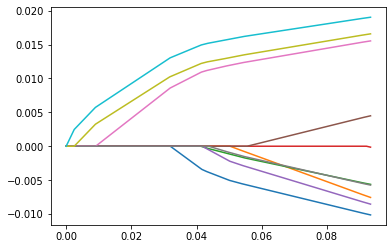

In [5]:
Ng = 5000
gg = np.linspace(-4, 2, num=Ng)
gg = np.power(10,gg)
p_est = np.zeros((Ng, 10))
p_true = 3
for i in range(Ng):
  clf_L = linear_model.Lasso(gg[i])
  clf_L.fit(X,y)
  p_est[i] = clf_L.coef_

pnorm = np.linalg.norm(p_est, axis=1, ord=1)

for i in range(10):
    plt.plot(pnorm, p_est.T[i], '-')


#plt.xscale('log')
plt.show()

## Reproduce Figure 8.1

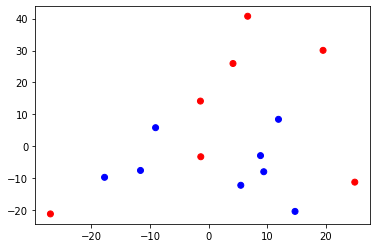

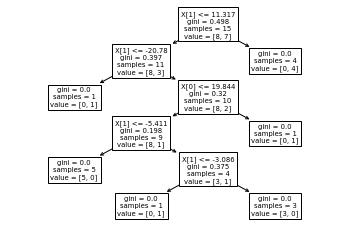

In [6]:
# Construct the training set 
X2, y2 =  make_blobs(n_samples=15, n_features=2, centers=2,
                           random_state=10, cluster_std=15)
col = np.array(['blue', 'red'])
plt.scatter(X2.T[0], X2.T[1], color=col[y2])

clf2 = DecisionTreeClassifier().fit(X2, y2)
plt.show()

tree.plot_tree(clf2)
plt.show()

## Reproduce Figure 8.6

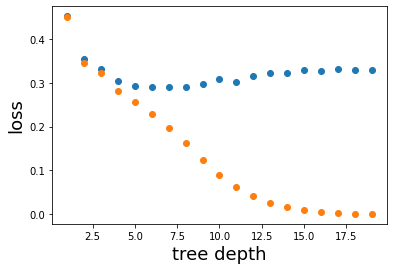

In [7]:
tree_depth = range(1,20)
test_loss_list = []
train_loss_list = []
xdepthlist = []
for d in tree_depth:
    xdepthlist.append(d)
    clf.max_depth=d
    cv_results = cross_validate(clf, X, y, cv=10, scoring=ZeroOneScore, return_train_score=True)
    cv = np.mean(cv_results['test_score'])
    test_loss_list.append(cv)
    tl = np.mean(cv_results['train_score'])
    train_loss_list.append(tl)
    
plt.xlabel('tree depth', fontsize=18, color='black')
plt.ylabel('loss', fontsize=18, color='black')
plt.scatter(xdepthlist, test_loss_list)
plt.scatter(xdepthlist, train_loss_list)
plt.show()